
# Trajectory of a Sphere in Two Dimensions
#### Computational Physics, Problem 3.2
##### Micheal Jones


#### Introduction:

In this report I will analyze and represent graphically the two dimensional motion of a spherical projectile close to the surface of the Earth given a set of initial conditions. I will make a plot of y versus x for these three scenarios, showing the path of motion in two dimensions, and then plot the total mechanical energy versus time for each scenario, discussing these results. Lastly, I will modify the program to find the launch angle that will yeild the maximum range for the steel ball in the first and second scenarios and the balsa wood ball in the third scenario assuming that the initial launch speed is 100 m/s.


#### Physics and Numerical method:

Note: In choosing my coordinate system, I chose y to be positive in the upward direction for the entirety of this document. The acceleration due to gravity is 9.81 meters per second squared in the downward direction. All projectiles will begin at initial position (defined by my choice of coordinates):

$$ (x_0, y_0) \ = \ (0,0) . $$

##### Conditions for the first scenario
In this scenario, there is a steel ball launched at 30 degrees with a speed of 100 meters per second in a vacuum. Because there are no external forces acting on the ball in a vacuum, there will be no drag and we should expect to see a nice, clean, parabolic trajectory along with a conservation of mechanical energy and a large range. In sum the initial conditions are as follows:

Launch angle:
$$ \theta_0 = 30^\circ = \frac{\pi}{6} \ radians $$
Launch velocity:
$$ \vec{v_0} = 100 \ m/s = (86.6 \hat{x} + 50 \hat{y}) \ m/s $$
Density of ball:
$$ \rho_{ball} \ = \ 8000  \ kg/m^3 $$
Density of medium:
$$ Vacuum, no \ drag $$

##### Conditions for the second scenario
In this scenario, there is a steel ball 2 centimeters in diameter launched at 30 degrees with a speed of 100 meters per second in the familiar medium of air. Because there are external forces acting on the ball this time, there will be drag and we should expect to see a variation in the trajectory and certainly in the mechanical energy and range. In sum the initial conditions are as follows:

Launch angle:
$$ \theta_0 = 30^\circ = \frac{\pi}{6} \ radians $$
Launch velocity:
$$ \vec{v_0} = 100 \ m/s = (86.6 \hat{x} + 50 \hat{y}) \ m/s $$
Density of ball:
$$ \rho_{ball} \ = \ 8000  \ kg/m^3 $$
Density of medium:
$$ \rho_{air} \ \tilde= \ 1.2  \ kg/m^3 $$
Radius of ball:
$$ r = 1 cm = 0.01 m $$
Drag constant:
$$ k = \frac{B}{m} $$

##### Conditions for the third scenario
In this scenario, there is a balsa wood ball 2 centimeters in diameter launched at 30 degrees with a speed of 100 meters per second in the medium of air. The density of this projectile is significantly lower than the previous two scenarios, so we can expect a much different trajectory and a large effect from the drag force. In sum the initial conditions are as follows:

Launch angle:
$$ \theta_0 = 30^\circ = \frac{\pi}{6} \ radians $$
Launch velocity:
$$ \vec{v_0} = 100 \ m/s = (86.6 \hat{x} + 50 \hat{y}) \ m/s $$
Density of ball:
$$ \rho_{ball} \ = \ 160  \ kg/m^3 $$
Density of medium:
$$ \rho_{air} \ \tilde= \ 1.2  \ kg/m^3 $$
Radius of ball:
$$ r = 1 cm = 0.01 m $$
Drag constant:
$$ k = \frac{B}{m} $$

In the first scenario, basic knowlege of kinematics tells me that I have enough information to solve this problem. The acceleration in the y direction is only that due to gravity, defined to be 9.81, and there is no acceleration in the x direction. So, as a method of completeness and also so that I can match up the size of my data arrays, I will calculate the total time the projectile spends in the air when launched under these conditions. To do this I treat the trajectory of the ball as two seperate events, from the ground to the maximum height, and then the fall from the maximum height back down to the ground. This allows me to use the fact that at the maximum height of trajectory, the ball changes directions and therefore is instantaneously traveling at 0 meters per second in the verticle direction to solve for the time it takes for the ball to get to this velocity. 

$$ t_{max, y} = t_1 = \frac{v_{yi}}{g} \ . $$ 

Now I can find the total height as follows: 

$$ Height = h = v_{yi}(t_{1})-\frac{1}{2}g(t_{1})^2 \ . $$

Then I find the time it takes for the ball to fall to the ground, add the two times and I get my total time.

$$ t_{fall} = t_2 = \frac{\sqrt{2g(h)}}{g} \ . $$

$$ \Delta t \ = t_1 + t_2 \ \tilde= \ 10.19 \ seconds \ . $$

With the total time identified, the rest of the problem becomes straight forward. Technically you have every element you need to find the ball's position at any given time using the kinematic equations, but because we are simulating using Euler's method, these equations wont be our primary focus.

In order to properly feed the information to python so that it can build a data set, I am using Euler's method. This is a method in which the code builds an array of data which correspond to the position and velocity at some small step forward in time, called dt, using the last term in order to define the next. For this reason I want to solve equations for a differential increase in position and velocity respectively. Finding the appropriate equation for Euler's method involves setting the derivative of position to the velocity component by definition and then moves the dt term from the left side of the equation to the right in order to find the differential value for position. The functions for the Euler method can be expressed:


$$ \frac{dy}{dt} = v_{yi} $$
$$ y_{(i+1)} - y_{i}  =  v_{yi} \ dt $$  

$$ y_{(i+1)} = y_i + v_{yi} \ dt $$


$$ x_{(i+1)} = x_i + v_{xi} \ dt $$

$$ v_{y(i+1)} = y_i - (g) \ dt $$

Note that the next term for both position and velocity involves the original value, this factor comes into play when the delta or differential x or y is expanded to be the difference between the final position and initial position. This term become positive when it is moved to the right side of the equation.

I also want to find the total mechanical energy and plot it with time. I will use a very similar methodology to get  this done as I used to calculate the position. The mechanical energy is equal to the sum of the potential energy, defined by position, and the kinetic energy, defined by velocity, and should be conserved in this case. In other words, the initial condition energy should have the same energy as the final condition. These calculations involve mass, so I will need to use the ball's density to find its mass given the the volume of a sphere.


Mass:
$$ \rho_{ball} \frac{4}{3} \pi r^3 \ \tilde = \ 0.034 \ kg \ (steel \ ball)$$

Potential Energy:

$$ U = mgy $$

Kinetic energy:

$$ K = \frac{1}{2} m v^2 $$

Mechanical Energy:

$$ E = U + K $$

This is best illustrated as a graph which is shown in the code. It does keep in line with expectations.

In the second part of the program, we add the factor of air resistance to the first part. Since I am assuming that air resistance will make the ball have a shorter trajectory, not a longer one, I will execute the function using the same size arrays as the first part and then adjust it to the appropriate size, which is the total time it takes for the ball to hit ground divided by the number of time steps. I will put a command in my loop that tells the program to do this and also to print the point at which the ball hits the ground in terms of the index of the array of values, this way I can shorten my arrays to the appropriate length. The equations that were used in the last example need to be modified to the following equations in order to include the effect of drag. Note: lower case k is the drag constant, not kinetic energy:


$$ x_{i+1} = x_i + v_{xi} \ dt $$

$$ y_{i+1} = y_i + v_{yi} \ dt $$

$$ v_{x(i+1)} = v_{xi} - k \ (v) v_{xi} \ dt $$

$$ v_{y(i+1)} = v_{yi} - k \ (v)v_{xi} \ dt - g \ dt $$

$$ v_{i} = \sqrt{v_{xi}^2 + v_{yi}^2} $$

When considering the mechanical energy of this event, one has to consider the drag force to be external to the system, and realize that energy will not be conserved in this case. Though we use the same method as that in the first scenario to calculate and plot the mechanical energy, the result will not be nearly the same.

In the final scenario, the balsa wood ball, which is far less dense, replaces the steel ball. Here we can expect that the lighter weight with equal surface area implies that the ball will experience a big affect from air resistance. Our equations from the second scenario do not change, only the variable which represents the ball's density.

Now I want to find the range of each event. I know that a projectile sphere is dominantly subject to quadratic drag, which complicates things. The dense steel ball will presumably be a bit resistant to the effect of drag but I predict the balsa wood sphere will be affected in a more noticable way due to its light weight and low density. In examining the range of projectiles in the problems like this, one can derive with a clever use of the taylor expansion series that the range when considering a projectile subject to linear drag can in fact be well represented by the range in a vacuum. Therefore, I can estimate the range as 


$$ R = \frac{ (v_i)^2 \sin(2 \theta_i)}{g} $$


#### Results: 

882.798576743 meters was my estimated range when launching at 30 degrees in a vacuum, and this turned out to be very close to my plotted value. During the event in a vacuum the energy was very well conserved, as expected without exposure to external forces, and the plot showing potential and kinetic energies shows two very neat parabola shape increasing on opposite intervals. The trial involving drag produced very reasonable results, yeilding 37.24225668350353 as the optimal angle for maximum range in degrees, 374.411524479 meters as the total distance acheived at this optimal angle with the initial velocity of 100 meters per second. Being within ten degrees of the optimal range, the projectile launched at 30 degrees as modeled graphically in the code reached 364.22004381 meters, ten meters shorter than the calculated maximum range. These results are encouraging! They make practical sense, and were acheived using two different sets of variables, one using numpy arrays and the other using python lists, so the fact that they agree so well certainly builds my confidence in the data. The balsa wood ball was effected very much by the drag force, as expected. It flew only a small fraction of the others, plotting it on the same axis as the other two trajectories made it almost too small to view. 20.3477391125 meters is the total distance acheived under the provided conditions for the balsa wood ball, so in comparison to previous results it is quite small. Upon setting an appropriate scale one can see that the shape of the curve is in line with expectation, rising for only a short distance and falling sharply. The plots which show the mechanical energies and velocity for the last two scenarios are very interesting; they do well to illustrate the energy lost due to exposure to the drag force and the lack of a role for potential energy in the case of the balsa wood ball given the limited trajectory. My code for range indicated 23.491269600363765 is the optimal angle for maximum range in degrees, which was perfectly within the bounds of expectation due to the relatively light weight of the ball. This makes sense conceptually because weight can be thought of as susceptability to a loss of height, which essentially means that less of the velocity has to work against gravity and more can tend toward horizontal to increase the range. 22.4734858773 meters is the total distance acheived at this angle, at a maximum height of only about 6.67 meters. The ratio between height acheived and range acheived agrees with light weight and low density of the projectile.



#### Verification:
I've done the manual calculations for the steel ball launched at 30 degrees and at the angle I calculated to yeild optimal range. My results for both were within 2 meters of the programs printed results. I've also calculated the height, time and range without air resistance in order to verify the results I obtained before I implemented drag. This agrees with the programs results. I've changed the code to reflect a higher initial velocity, 120 meters per second, and ran it- here I had to make some adjustments to see the results well, but the code worked within reason and yeilded a value within 1 meter of my manually calculated adjustment. This verified an additional value which confirmed the result from my code and tested the variability of this particular code. My manual calculation for the balsa wood ball are in line with my code as well, within 3 (nearly 2) meters.

#### Conclusion:
In the first part of the problem we had a basic two dimensional trajectory neglecting all external forces on the     ball. Given this condition, the total energy should be conserved from the initial conditions to the final conditions. My data accurately shows this to be the case, though the velocity varies a small amount. In the second and third part of the problem, the drag due to air resistance is an external force, which means that energy is not conserved, as we can see from the graphs produced. A very prevalent implication of my calculations is the effect of an object's mass on it's susceptibility to air resistance, as well as the large role air resistance plays in kinematics, more than halving the range according to my results. Both of my optimum range angles made good sense and in the case of the balsa wood ball I gained a deeper understanding of why this angle would need to be more shallow than that of the steel ball in order to acheive the largest range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex
%matplotlib inline

In [2]:
print("""
First I'm going to define my constant values globally. Positive Y is upward.
""")

g = 9.81 # acceleration due to gravity
dt = 0.01 # time step
rhoAir = 1.2 # density of air
rhoBall = 8000.0 # density of ball
r = 0.01 # radius converted to meters
m = (rhoBall*(4/3)*np.pi*r**3)
k = (3/16)*(rhoAir/rhoBall)*(1/r) # this is the c/m, or in this case B/m, term for drag on a sphere
theta = (np.pi/6) # launch angle converted to radians
v_0 = 100.0 # initial velocity in m/s
y_0 = 0.0 # initial position
x_0 = 0.0 

v_yi = v_0*np.sin(theta) # Components of the initial velocity are defined here automatically
v_xi = v_0*np.cos(theta)

display(Math(r'\vec{v_i} = 100 \ m/s = (86.6 \hat{x} + 50 \hat{y}) \ m/s'))
display(Math(r'\theta_i = 30^\circ = \frac{\pi}{6} \ radians'))
display(Math(r'\rho_{air} \ \tilde= \ 1.2  \ kg/m^3'))
display(Math(r'\rho_{ball} \ \tilde= \ 8000  \ kg/m^3'))
display(Math(r'r = 0.01 \ m'))
display(Math(r"k = \frac{B}{m} \ \tilde = \ 0.003"))


First I'm going to define my constant values globally. Positive Y is upward.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
print("""
Now I need to calculate the total time in order to define an appropriate range I will do this in the notebook
in order to properly show the physics behind the basic kinematic argument.
Given that this is the time for the event without air resistance, 
it should provide a more than adequate range of times for all of the projectile scenarios to follow
and I can adjust their range individually to not go outside of the total time for each event 
by observing when y is less than zero or defining a rule to do so for me if need be
""")

tMaxY = v_yi/g 
height = (v_yi*tMaxY)-(0.5)*g*tMaxY**2
tFall = (np.sqrt(2*g*height))/g
tTotal = tMaxY+tFall
t = np.arange(0.0,tTotal,dt)
vX = np.zeros(t.size)
vY = np.zeros(t.size)
y = np.zeros(t.size)
x = np.zeros(t.size)
vX[0] = v_xi
vY[0] = v_yi
y[0] = y_0
x[0] = x_0

"""
For a clearer view of my math, run this cell and view the LaTeX typeset math.
This will work in any sequence with the condition that the first cell has been run.
"""

display(Math(r't_{max, y} = t_1 = \frac{v_{yi}}{g}'))
display(Math(r'Height = h = v_{yi}(t_{1})-\frac{1}{2}g(t_{1})^2'))
display(Math(r't_{fall} = t_2 = \frac{\sqrt{2g(h)}}{g}'))
display(Math(r'\Delta t \ = t_1 + t_2 \ \tilde= \ 10.19 \ seconds'))


Now I need to calculate the total time in order to define an appropriate range I will do this in the notebook
in order to properly show the physics behind the basic kinematic argument.
Given that this is the time for the event without air resistance, 
it should provide a more than adequate range of times for all of the projectile scenarios to follow
and I can adjust their range individually to not go outside of the total time for each event 
by observing when y is less than zero or defining a rule to do so for me if need be



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
print("""
Here I will define some step functions which will be fed the velocity components along with position 
and apply kinematics in given time intervals.
""")

def velX(vX):
    return vX  #With no air resistance, the velocity in the x direction remains constant indefinitely

def velYstep(vY,g,dt):
    return vY-g*dt 
    
def yPosStep(y,vY,g,dt):
    return y+vY*dt 

def xPosStep(x,vX,dt):
    return x+vX*dt


display(Math(r'y_s = y_i + v_{yi} \ dt'))
display(Math(r'x_s = x_i + v_{xi} \ dt '))
display(Math(r'v_{ys} = v_{yi} - g \ dt'))


Here I will define some step functions which will be fed the velocity components along with position 
and apply kinematics in given time intervals.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
print("""
Now I will call back to my functions using eulers method,
referencing the previous term in order to indicate the next.
Here I will also make a prediction about the range and the optimal launch angle for the projectile
with the stipulation of no air resistance using a formula referenced at the beginning of this report.
I will also estimate the range given my fixed launch angle of thirty degrees to see if the estimation 
agrees with my results and therefore represents a valid guideline.
""")
i = 0
for i in range (1,t.size):
    vY[i] = velYstep(vY[i-1],g,dt)
    vX[i] = velX(vX[i-1])
    y[i] = yPosStep(y[i-1],vY[i-1],g,dt)
    x[i] = xPosStep(x[i-1],vX[0],dt)

th = []
th.append(0.0)
def thetaStep(th,dt):
    return th + dt
i = 0
while th[i]<=(np.pi/2):
    th.append(thetaStep(th[-1],dt)) # This gives me a list of angles in radians from zero to ninety degrees in steps dt
    i = i+1

estRangeProjVac = 2*vX[0]*vY[0]/g # This is a formula for range in a vacuum which I am feeding my initial velocity in components 
print((estRangeProjVac), 'is my estimated range when launching at 30 degrees.')
i = 0
estRangeProjVac = 2*v_0*np.cos(th)*v_0*np.sin(th)/g # This is that same formula expressed as a function of angle so that I can vary the angle and find a maximum range
for i in range (0,len(th)):
    if estRangeProjVac[i] >= max(estRangeProjVac):
        print(((th[i])*180/np.pi), 'is the optimal angle for the estimated range in a vacuum in degrees')
        print((estRangeProjVac[i]), 'is an estimation for the range made using assumptions of no air resistance in meters')



Now I will call back to my functions using eulers method,
referencing the previous term in order to indicate the next.
Here I will also make a prediction about the range and the optimal launch angle for the projectile
with the stipulation of no air resistance using a formula referenced at the beginning of this report.
I will also estimate the range given my fixed launch angle of thirty degrees to see if the estimation 
agrees with my results and therefore represents a valid guideline.

882.798576743 is my estimated range when launching at 30 degrees.
45.26366581533506 is the optimal angle for the estimated range in a vacuum in degrees
1019.32481804 is an estimation for the range made using assumptions of no air resistance in meters



Now to plot the results! Normally my fingers would be crossed,
but I just have such a high level of certainty and confidence when it comes to my python skills 
that I will forgo superstition and roll the dice.
Of course, that's a joke.



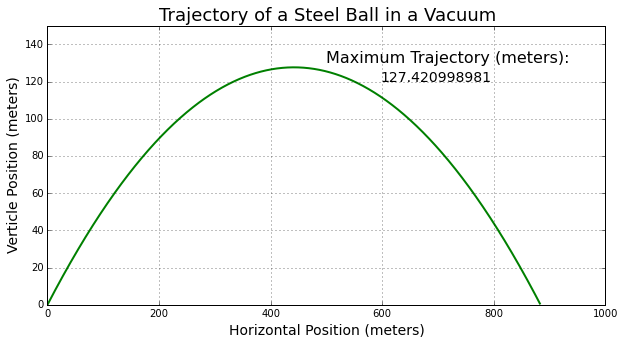

In [6]:
print("""
Now to plot the results! Normally my fingers would be crossed,
but I just have such a high level of certainty and confidence when it comes to my python skills 
that I will forgo superstition and roll the dice.
Of course, that's a joke.
""")

plt.figure(0)
plt.figure(figsize=(10,5))
plt.plot(x,y, color = 'green', linewidth = 2.0)
plt.xlabel('Horizontal Position (meters)', size = 14)
plt.ylabel('Verticle Position (meters)', size = 14)
plt.title('Trajectory of a Steel Ball in a Vacuum', size = 18)
plt.text(600, 120, height, size = 14 )
plt.text(500, 130, 'Maximum Trajectory (meters):' , size = 16)
plt.axis([0, 1000, 0, 150])
plt.grid(True)
plt.show()

In [7]:
print("""
Next I want to find the total mechanical energy and plot it with time. 
I will use a very similar methodology to get  this done as I used to calculate the position. 
I could use lists and an append command but the numpy zero arrays are working well for me here. 
I will not print these functions in LaTeX as they represent basic energy conservation defi-nitions 
and are only helping to define an array of data.
""")

v = np.zeros(t.size) # I am redefining my velocity array and sending it back to a raw state
v[0] = v_0

pE = np.zeros(t.size) # This is my chosen variable to define potential energy
pE[0] = (m*g*y_0)

kE = np.zeros(t.size) # This is my chosen variable for kinetic energy, I will be careful to differentiate it from 'k'
kE[0] = ((0.5)*m*v_0**2)

e = np.zeros(t.size)
e[0] = (m*g*y_0)+((0.5)*m*v_0**2)

def vNew(vX,vY):
    return np.sqrt(vX**2+vY**2)

def potEnrgy(m,g,y):
    return m*g*y

def kinEnrgy(m,v):
    return (0.5)*m*v**2

def mechEnrgy(pE,kE):
    return pE + kE

for i in range(1,t.size):
    v[i] = vNew(vX[i-1],vY[i-1])
    pE[i] = potEnrgy(m,g,y[i-1])
    kE[i] = kinEnrgy(m,v[i-1])
    e[i] = mechEnrgy(pE[i-1],kE[i-1])



Next I want to find the total mechanical energy and plot it with time. 
I will use a very similar methodology to get  this done as I used to calculate the position. 
I could use lists and an append command but the numpy zero arrays are working well for me here. 
I will not print these functions in LaTeX as they represent basic energy conservation defi-nitions 
and are only helping to define an array of data.




Although I can already see that energy   will roughly be entirely conserved and constant (+/-0.02 J)
and the velocity will be relatively constant, maintaining the majority of its speed in the unbridled x component
but still dipping as the velocity in the y direction falls to zero. 
I will plot both of these as functions of time in order to truly ill-ustrate my results. 



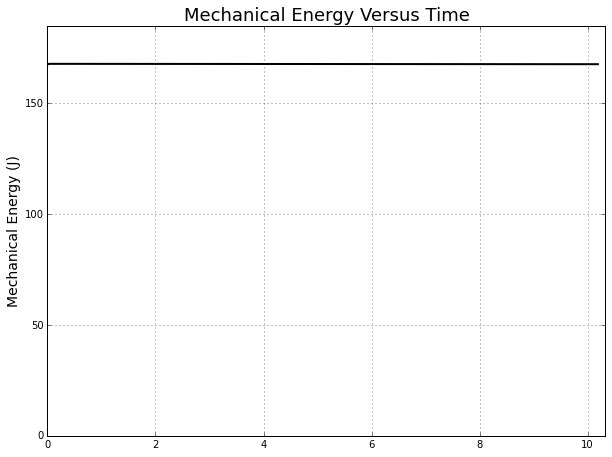

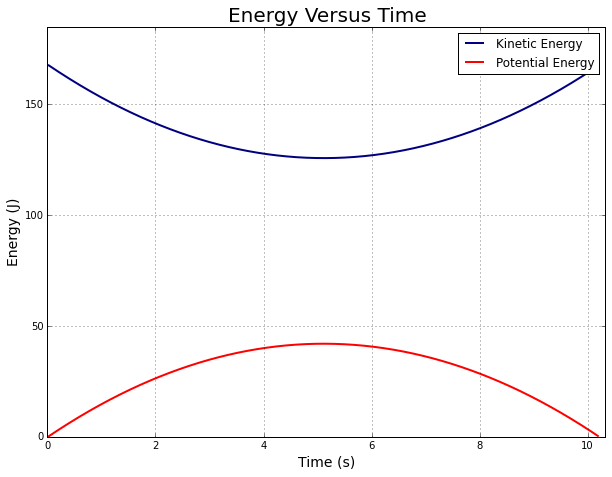

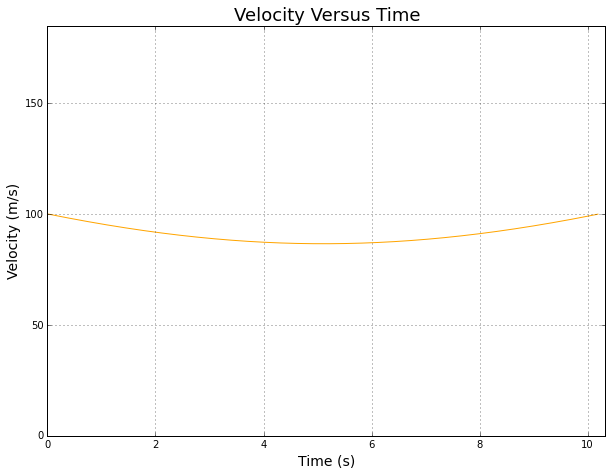

In [8]:
print("""
Although I can already see that energy   will roughly be entirely conserved and constant (+/-0.02 J)
and the velocity will be relatively constant, maintaining the majority of its speed in the unbridled x component
but still dipping as the velocity in the y direction falls to zero. 
I will plot both of these as functions of time in order to truly ill-ustrate my results. 
""")
plt.figure(1)
plt.figure(figsize=(10,25))
plt.subplot(311)
plt.plot(t,e, linewidth = 2.0, color = 'black')
plt.ylabel('Mechanical Energy (J)', size = 14)
plt.title('Mechanical Energy Versus Time', size = 18)
plt.axis([0, 10.33, 0, 185])
plt.grid(True)
plt.show()

plt.figure(2)
plt.figure(figsize=(10,25))
plt.subplot(312)
kinetic, = plt.plot(t,kE, color='navy', linewidth=2.0)
potential, = plt.plot(t,pE, color='red', linewidth=2.0)
plt.ylabel('Energy (J)', size = '14')
plt.title('Energy Versus Time', size = '20')
plt.axis([0, 10.33, 0, 185])
plt.xlabel('Time (s)', size = '14')
plt.legend([kinetic, potential], ["Kinetic Energy", "Potential Energy"])
plt.grid(True)
plt.show()

plt.figure(3)
plt.figure(figsize=(10,25))
plt.subplot(313)
plt.plot(t,v, color='orange')
plt.xlabel('Time (s)', size = 14)
plt.ylabel('Velocity (m/s)', size = 14)
plt.title('Velocity Versus Time', size = 18)
plt.axis([0, 10.33, 0, 185])
plt.grid(True)
plt.show()

In [9]:
print("""
Fortunately, I can use many of the same globally defined values for the first part of the problem in the second part 
To begin I want to know the total time in order to define an appropriate range 
In lieu of calculation I will leave the range the same as the last part of the problem
I can find when y=0 with the print command by defining a rule in the main loop later in the code 
when I learn how large the range has to be I can adjust it from the larger flight time.
""")

t = np.arange(0.0,7.692,dt)
v = np.zeros(len(t))
vY = np.zeros(len(t))
vX = np.zeros(len(t))
y = np.zeros(len(t))
x = np.zeros(len(t))
v[0] = v_0
vY[0] = v_yi
vX[0] = v_xi 
y[0] = y_0
x[0] = x_0



Fortunately, I can use many of the same globally defined values for the first part of the problem in the second part 
To begin I want to know the total time in order to define an appropriate range 
In lieu of calculation I will leave the range the same as the last part of the problem
I can find when y=0 with the print command by defining a rule in the main loop later in the code 
when I learn how large the range has to be I can adjust it from the larger flight time.



In [10]:
print("""
Here I'll define some step functions. These functions will be called in my loop in order to build my data
array up from the initial conditions using Euler's method in this first attempt.
""")
    
def yPosStepDrag(y,vY,dt):
    return y+vY*dt

def xPosStepDrag(x,vX,dt):
    return x+vX*dt

def velYstepDrag(vY,v,k,g,dt):
    return (vY-k*v*vY*dt-g*dt)
   
def velXstepDrag(vX,v,k,dt):
    return vX-k*v*vX*dt
    
def speed(vX,vY):
    return np.sqrt(vX**2+vY**2)


display(Math(r'x_s = x_i + v_{xi} \ dt'))
display(Math(r'y_s = y_i + v_{yi} \ dt'))
display(Math(r'v_{xs} = v_{xi} - k \ v_i \ v_{xi} \ dt '))
display(Math(r'v_{ys} = v_{yi} - k \ v_i \ v_{yi} \ dt  - g \ dt'))
display(Math(r'v_s = \sqrt{v_{xi}^2 + v_{yi}^2}'))


Here I'll define some step functions. These functions will be called in my loop in order to build my data
array up from the initial conditions using Euler's method in this first attempt.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
print("""
Now I will call back to my functions using eulers method, referencing the previous term
here, where I am defining the iterations of the functions in order to fill the arrays 
I will insert a command which will clarify the appropriate  size for the arrays 
I will also find the approximate height of the trajectory by finding the point 
at which the y component of velocity is zero
""")

for i in range (1,len(t)):
    
    x[i] = xPosStepDrag(x[i-1],vX[i-1],dt)
    y[i] = yPosStepDrag(y[i-1],vY[i-1],dt)
    vX[i] = velXstepDrag(vX[i-1],v[i-1],k,dt)
    vY[i] = velYstepDrag(vY[i-1],v[i-1],k,g,dt)
    
    v[i] = speed(vX[i-1],vY[i-1])
    
    if x[i]>x[i-1]:
        distance = x[-1]
    
    if vY[i] < 0.015 and vY[i] > -0.015:
        h = y[i] #this defines the height of the trajectory to be h
        #print(i) # This command shows which iteration 'i' represents the height iteration and when vY is approximately (within epsilon approx. = dt) zero.
    while y[i]<0:
        y[i] = 0.0 
    if y[i] == 0.0:
        y[i] = 0.0
        #print(i) # This command shows which iteration 'i' is associated with the sphere hitting the ground.
        break
print(distance, 'meters is the total distance acheived under the provided conditions.')


Now I will call back to my functions using eulers method, referencing the previous term
here, where I am defining the iterations of the functions in order to fill the arrays 
I will insert a command which will clarify the appropriate  size for the arrays 
I will also find the approximate height of the trajectory by finding the point 
at which the y component of velocity is zero

364.22004381 meters is the total distance acheived under the provided conditions.


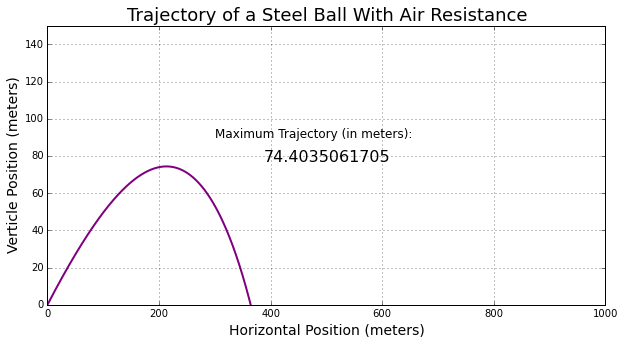

In [12]:
plt.figure(5)
plt.figure(figsize=(10,5))
plt.plot(x,y, color = 'purple', linewidth = 2.0)
plt.xlabel('Horizontal Position (meters)', size=14)
plt.ylabel('Verticle Position (meters)', size=14)
plt.title('Trajectory of a Steel Ball With Air Resistance', size=18)
plt.text(390, 77, h, size = 16)
plt.text(300, 90, 'Maximum Trajectory (in meters):' , size=12)
plt.axis([0, 1000, 0, 150])
plt.grid(True)
plt.show()

In [13]:
print("""
Next I want to find the total mechanical energy and plot it versus time.
I will use a very similar methodology to get this done as I used to calculate the position.
I could use lists and an append command but the numpy zero arrays are working well for me here.
""")

pE = np.zeros(len(t))
pE[0] = (m*g*y_0)
kE = np.zeros(len(t))
kE[0] = ((0.5)*m*v_0**2)
e = np.zeros(len(t))
e[0] = (m*g*y_0)+((0.5)*m*v_0**2)

for i in range(1,len(t)):
    v[i] = vNew(vX[i],vY[i])
    pE[i] = potEnrgy(m,g,y[i])
    kE[i] = kinEnrgy(m,v[i])
    e[i] = mechEnrgy(pE[i],kE[i])



Next I want to find the total mechanical energy and plot it versus time.
I will use a very similar methodology to get this done as I used to calculate the position.
I could use lists and an append command but the numpy zero arrays are working well for me here.



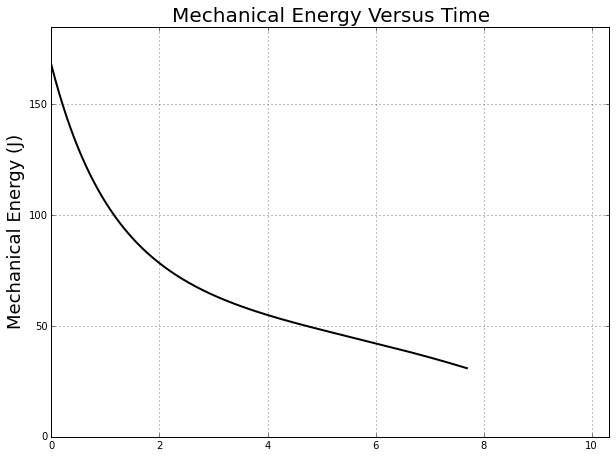

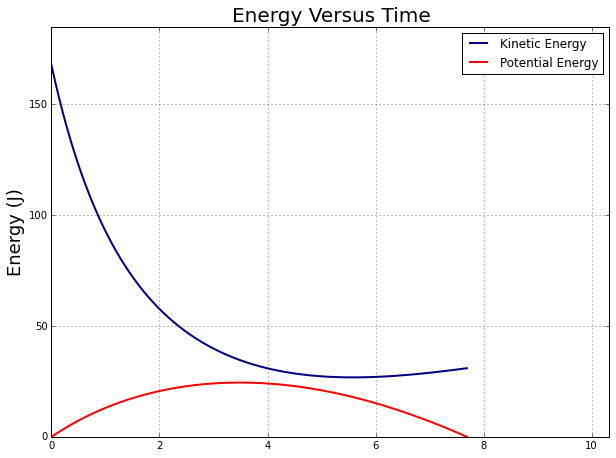

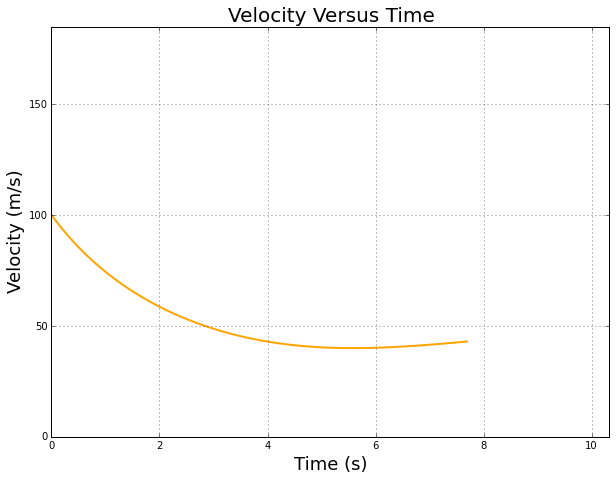

In [14]:

plt.figure(6)
plt.figure(figsize=(10,25))
plt.subplot(311)
plt.plot(t,e, color='black', linewidth=2.0)
plt.ylabel('Mechanical Energy (J)', size = '18')
plt.title('Mechanical Energy Versus Time', size = '20')
plt.axis([0, 10.33, 0, 185])
plt.grid(True)
plt.show()

plt.figure(7)
plt.figure(figsize=(10,25))
plt.subplot(312)
kinetic, = plt.plot(t,kE, color='navy', linewidth=2.0)
potential, = plt.plot(t,pE, color='red', linewidth=2.0)
plt.ylabel('Energy (J)', size = '18')
plt.title('Energy Versus Time', size = '20')
plt.axis([0, 10.33, 0, 185])
plt.legend([kinetic, potential], ["Kinetic Energy", "Potential Energy"])
plt.grid(True)
plt.show()

plt.figure(8)
plt.figure(figsize=(10,25))
plt.subplot(313)
plt.plot(t,v, color='orange', linewidth=2.0)
plt.ylabel('Velocity (m/s)', size = '18')
plt.title('Velocity Versus Time', size = '20')
plt.axis([0, 10.33, 0, 185])
plt.xlabel('Time (s)', size = '18')

plt.grid(True)
plt.show()


In [15]:
print("""
This part might be a bit confusing, but I am now going to define new variables for use in finding the range. 
These new variables wont depend on a single specific theta, but they will only differ by a small amount.
Another advantage is that this will allow me to use python lists and leave my numpy arrays safe and untouched.
My approach to this problem, where there are two changing variable, time and theta is to nest a loop within a loop. 
The outer loop will iterate over theta and the inner over time.
""")

i = 0
time = []
time.append(0.0)
def timeStep(time,dt):
    return time + dt
i = 0
while time[i]<=(10):
    time.append(timeStep(time[-1],dt)) # This yeilds a list of times spanning 10 seconds, which should be adequate given previous results
    i = i+1

"""
THIS IS THE CODE I USED EARLIER TO ESTIMATE RANGE IN A VACUUM, 
IT WILL BE REFERENCED IN THIS SECTION AND IS HERE FOR CONVENIENCE

th = []
th.append(0.0)
def thetaStep(th,dt):
    return th + dt

i = 0
while th[i]<=(np.pi/2):
    th.append(thetaStep(th[-1],dt)) # This gives me a list of angles in radians from zero to ninety degrees in steps dt
    i = i+1
"""

def xiVelComp(velocity,angle):
    return velocity*np.cos(angle)

def yiVelComp(velocity,angle):
    return velocity*np.sin(angle)

vYi = []
vXi = []
vel = []
vel.append(v_0)

i = 0
for i in range(0,len(th)):
    vYi.append(yiVelComp(v_0,th[i]))
    vXi.append(xiVelComp(v_0,th[i])) # Given that the initial velocity is consistent, I am able to create a list of initial velocities by components

xRange = np.zeros(len(th))
yRange = np.zeros(len(th))
v_x = []
v_y = []  
xR = []
yR = []

n = 0
i = 0
for i in range(0,len(th)):
    v_x = []
    v_y = []  
    xR = []
    yR = []
    v_x.append(vXi[i])
    v_y.append(vYi[i])
    xR.append(0.0)
    yR.append(0.0)
    n = n+1
    for n in range(1,len(t)):
        while yR[n-1] >= 0.0:
            xR.append(xPosStepDrag(xR[-1],v_x[-1],dt))
            yR.append(yPosStepDrag(yR[-1],v_y[-1],dt))
            v_y.append(velYstepDrag(v_y[-1],vel[-1],k,g,dt))
            v_x.append(velXstepDrag(v_x[-1],vel[-1],k,dt))
            vel.append(speed(v_x[-1],v_y[-1]))
            
            if xR[n] > xR[n-1]:
                xRange[i] = (xR[n]) # This way of doing it gives me the max distance acheived at each angle
                if xRange[i] > xRange[i-1]: 
                    optimalAngle = th[i] # Here is where I define my angle for the overall maximum range
            #if yR[n] > yR[n-1]:
            #   yRange[i] = (yR[n]) # This will yeild height of trajectory
                    
            n = n+1
        else:
            i = i+1
            n = 0   
            break
    i = i+1
    
print((optimalAngle)*(180/np.pi),'is the actual optimal angle for maximum range in degrees')
print(max(xRange), 'is the total distance acheived at this angle and is displayed in meters')



This part might be a bit confusing, but I am now going to define new variables for use in finding the range. 
These new variables wont depend on a single specific theta, but they will only differ by a small amount.
Another advantage is that this will allow me to use python lists and leave my numpy arrays safe and untouched.
My approach to this problem, where there are two changing variable, time and theta is to nest a loop within a loop. 
The outer loop will iterate over theta and the inner over time.

37.24225668350353 is the actual optimal angle for maximum range in degrees
374.411524479 is the total distance acheived at this angle and is displayed in meters


In [16]:
print("""
On to the third part of the problem - the balsa wood projectile! I predict that this is not an effective projectile!
I will re-define some global variables here to allow manipulation of the projectile/medium at this point in the code.
I will also empty my arrays and change their range by re-defining them.
""")

rhoAir = 1.2 #density of air
rhoBall = 160 #density of ball
r = 0.01 #radius converted to meters
m = rhoBall*(4/3)*np.pi*r**3 #ball's mass
k = (3/16)*(rhoAir/rhoBall)*(1/r) #this is the b/m term for drag

t = np.arange(0.0,2.191,dt)
v = np.zeros_like(t)
vY = np.zeros_like(t)
vX = np.zeros_like(t)
y = np.zeros_like(t)
x = np.zeros_like(t)
v[0] = v_0
vY[0] = v_yi
vX[0] = v_xi 
y[0] = y_0
x[0] = x_0
i = 0

display(Math(r'\rho_{ball} \ = \ 160  \ kg/m^3'))


On to the third part of the problem - the balsa wood projectile! I predict that this is not an effective projectile!
I will re-define some global variables here to allow manipulation of the projectile/medium at this point in the code.
I will also empty my arrays and change their range by re-defining them.



<IPython.core.display.Math object>

In [17]:

for i in range (1,len(t)):
    
    x[i] = xPosStepDrag(x[i-1],vX[i-1],dt)
    y[i] = yPosStepDrag(y[i-1],vY[i-1],dt)
    vX[i] = velXstepDrag(vX[i-1],v[i-1],k,dt)
    vY[i] = velYstepDrag(vY[i-1],v[i-1],k,g,dt)
    
    v[i] = speed(vX[i-1],vY[i-1])
    if x[i]>x[i-1]:
        distance = x[-1]
    if vY[i] < dt and vY[i] > -dt: # Using dt as an epsilon to define my maximum height!
        h = y[i] # This defines the height of the trajectory to be h
        #print(i) # This command shows which iteration 'i' represents height, when vY is approximately zero.
    while y[i]<0:
        y[i] = 0.0 
    if y[i] == 0.0:
        y[i] = 0.0
        #print(i) # This command shows which iteration 'i' is associated with the sphere hitting the ground.
        break

print(distance, 'meters is the total distance acheived under the provided conditions.')

20.3477391125 meters is the total distance acheived under the provided conditions.



Time to plot the data from the balsa wood ball's trajectory!
I am purposefully using the same scale on each of these codes in order to provide proper perpective; 
I will plot another graph which is more appropriately sized so that the shape of the function can be seen clearly. 



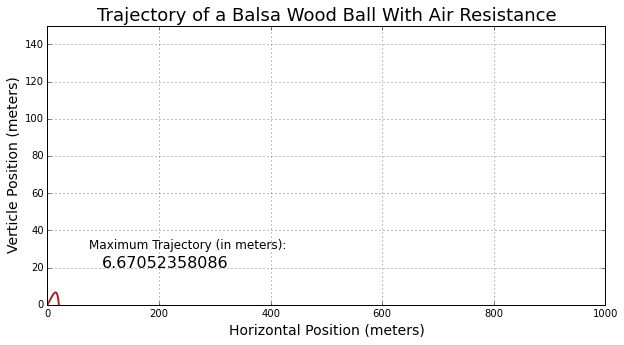

In [18]:
print("""
Time to plot the data from the balsa wood ball's trajectory!
I am purposefully using the same scale on each of these codes in order to provide proper perpective; 
I will plot another graph which is more appropriately sized so that the shape of the function can be seen clearly. 
""")

plt.figure(9)
plt.figure(figsize=(10,5))
plt.plot(x,y, color = 'brown', linewidth = 2.0)
plt.xlabel('Horizontal Position (meters)', size = 14)
plt.ylabel('Verticle Position (meters)', size = 14)
plt.title('Trajectory of a Balsa Wood Ball With Air Resistance', size = 18)
plt.text(100, 20, h, size = 16)
plt.text(75, 30, 'Maximum Trajectory (in meters):' , size=12)
plt.axis([0, 1000, 0, 150])
plt.grid(True)
plt.show()

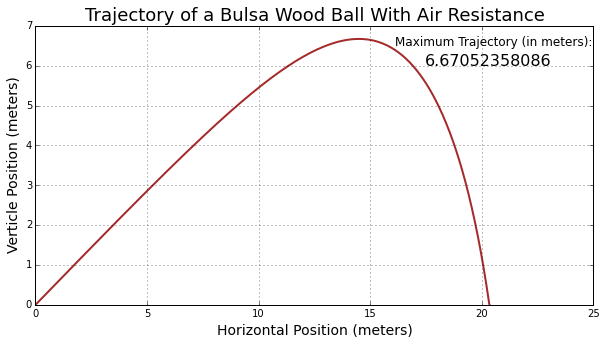

In [19]:
plt.figure(10)
plt.figure(figsize=(10,5))
plt.plot(x,y, color = 'brown', linewidth = 2.0)
plt.xlabel('Horizontal Position (meters)', size = 14)
plt.ylabel('Verticle Position (meters)', size = 14)
plt.title('Trajectory of a Bulsa Wood Ball With Air Resistance', size = 18)
plt.text(17.5, 6.0, h, size = 16)
plt.text(16.1, 6.5, 'Maximum Trajectory (in meters):' , size=12)
plt.grid(True)
plt.show()

In [20]:
print("""
Next I want to find the total mechanical energy and plot it versus time.
I will use the same methodology to get this done as I used in the last problem, but with some different values. 
""")

pE = np.zeros_like(t)
pE[0] = (m*g*y_0)
kE = np.zeros_like(t)
kE[0] = ((0.5)*m*v_0**2)
e = np.zeros_like(t)
e[0] = (m*g*y_0)+((0.5)*m*v_0**2)

for i in range(1,len(t)):
    v[i] = vNew(vX[i],vY[i])
    pE[i] = potEnrgy(m,g,y[i])
    kE[i] = kinEnrgy(m,v[i])
    e[i] = mechEnrgy(pE[i],kE[i])



Next I want to find the total mechanical energy and plot it versus time.
I will use the same methodology to get this done as I used in the last problem, but with some different values. 




The following plots of energy and velocity versus time will not be in the same scale as the previous plots as 
the values are immeasurable on the consistently scaled graphs.



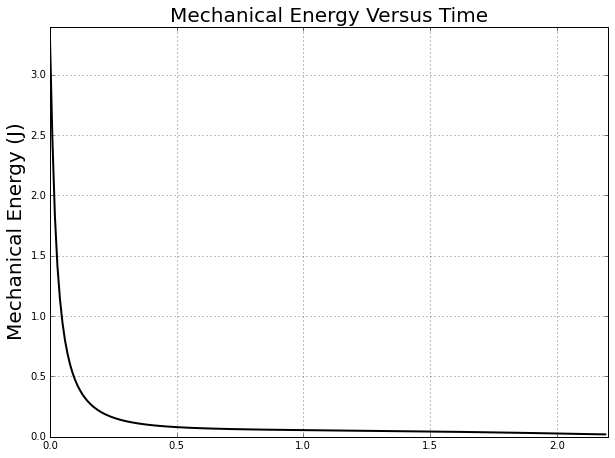

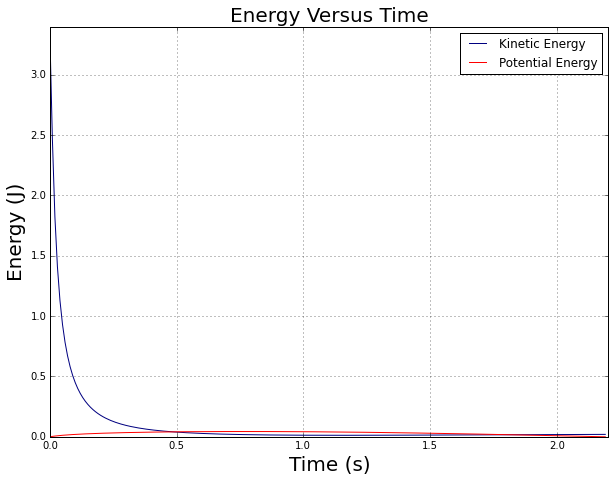

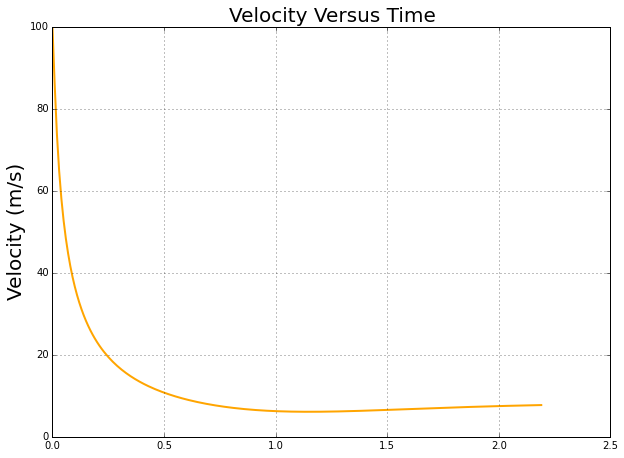


Notice that the system had to blow the y axis scale up to 100 m/s just to show the 
velocity versus time graph in a meaningful way!



In [21]:
print("""
The following plots of energy and velocity versus time will not be in the same scale as the previous plots as 
the values are immeasurable on the consistently scaled graphs.
""")
plt.figure(11)
plt.figure(figsize=(10,25))
plt.subplot(311)
plt.plot(t,e, color='black', linewidth=2.0)
plt.ylabel('Mechanical Energy (J)', size = '20')
plt.title('Mechanical Energy Versus Time', size = '20')
plt.axis([0, 2.2, 0, 3.4])
plt.grid(True)
plt.show()

plt.figure(12)
plt.figure(figsize=(10,25))
plt.subplot(312)
kinetic, = plt.plot(t,kE, color='navy', linewidth=1.0)
potential, = plt.plot(t,pE, color='red', linewidth=1.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time', size = '20')
plt.axis([0, 2.2, 0, 3.4])
plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential], ["Kinetic Energy", "Potential Energy"])
plt.grid(True)
plt.show()

plt.figure(13)
plt.figure(figsize=(10,25))
plt.subplot(313)
plt.plot(t,v, color='orange', linewidth=2.0)
plt.ylabel('Velocity (m/s)', size = '20')
plt.title('Velocity Versus Time', size = '20')
#plt.axis([0, 2.2, 0, 3.4]) # I've allowed the system to define the scale here due to the difficulty in seeing this data
plt.grid(True)
plt.show()

print("""
Notice that the system had to blow the y axis scale up to 100 m/s just to show the 
velocity versus time graph in a meaningful way!
""")

In [22]:

i = 0
time = []
time.append(0.0)
def timeStep(time,dt):
    return time + dt
i = 0
while time[i]<=(10):
    time.append(timeStep(time[-1],dt)) # This yeilds a list of times spanning 10 seconds, which should be adequate given previous results
    i = i+1

th = []
th.append(0.0)
def thetaStep(th,dt):
    return th + dt
i = 0
while th[i]<=(np.pi/2):
    th.append(thetaStep(th[-1],dt)) # This gives me a list of angles in radians from zero to ninety degrees in steps dt
    i = i+1

def xiVelComp(velocity,angle):
    return velocity*np.cos(angle)

def yiVelComp(velocity,angle):
    return velocity*np.sin(angle)

vYi = []
vXi = []
vel = []
vel.append(v_0)

i = 0
for i in range(0,len(th)):
    vYi.append(yiVelComp(v_0,th[i]))
    vXi.append(xiVelComp(v_0,th[i])) # Given that the initial velocity is consistent, I am able to create a list of initial velocities by components

xRange = np.zeros(len(th))
yRange = np.zeros(len(th))
v_x = []
v_y = []  
xR = []
yR = []

n = 0
i = 0
for i in range(0,len(th)):
    v_x = []
    v_y = []  
    xR = []
    yR = []
    v_x.append(vXi[i])
    v_y.append(vYi[i])
    xR.append(0.0)
    yR.append(0.0)
    n = n+1
    for n in range(1,len(t)):
        while yR[n-1] >= 0.0:
            xR.append(xPosStepDrag(xR[-1],v_x[-1],dt))
            yR.append(yPosStepDrag(yR[-1],v_y[-1],dt))
            v_y.append(velYstepDrag(v_y[-1],vel[-1],k,g,dt))
            v_x.append(velXstepDrag(v_x[-1],vel[-1],k,dt))
            vel.append(speed(v_x[-1],v_y[-1]))
            
            if xR[n] > xR[n-1]:
                xRange[i] = (xR[n]) # This way of doing it gives me the max distance acheived at each angle
                if xRange[i] > xRange[i-1]: 
                    optimalAngle = th[i] # Here is where I define my angle for the overall maximum range
            if yR[n] > yR[n-1]:
                yRange[i] = (yR[n]) # This will yeild height of trajectory
                    
            n = n+1
        else:
            i = i+1
            n = 0   
            break
    i = i+1
    
print((optimalAngle)*(180/np.pi),'is the actual optimal angle for maximum range in degrees')
print(max(xRange), 'is the total distance acheived at this angle and is displayed in meters')

23.491269600363765 is the actual optimal angle for maximum range in degrees
22.4734858773 is the total distance acheived at this angle and is displayed in meters


... And THAT is how you spend a very long time writing a simple, yet versatile code!